
Sequence A:
Sequence: TAAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAATACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCAGACAAGAGAATAATGGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTTTGGAGCAAGACAAATGATGCTGGATCGGACAGGGTGATGGTGTCTCCCCTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTACAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGTTGAAAGGTTAAAACATGGAACCTTCGGTCCCGTTCATTTCCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCGGGCCACGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCGCAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAGATTGCTCCTTTAATGGTGGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAGGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTTAGAAATGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAATCCAACTGAGGAACAAGCTGTGGATATATGCAAAGCAGCAATGGGTTTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGA

c:\Users\ASUS\xStyNWx\Documents\Software Master\Computational Biology\environments\compbio\Lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


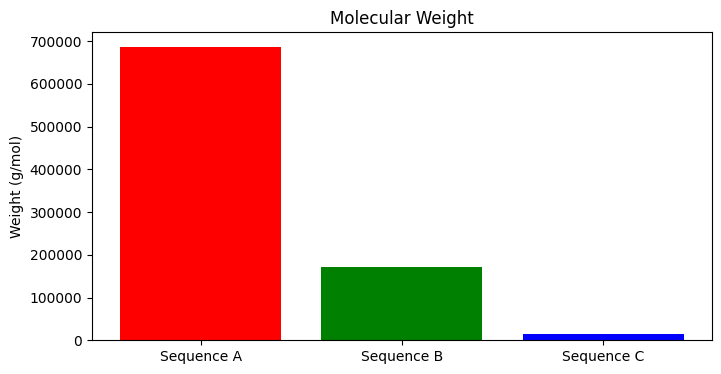

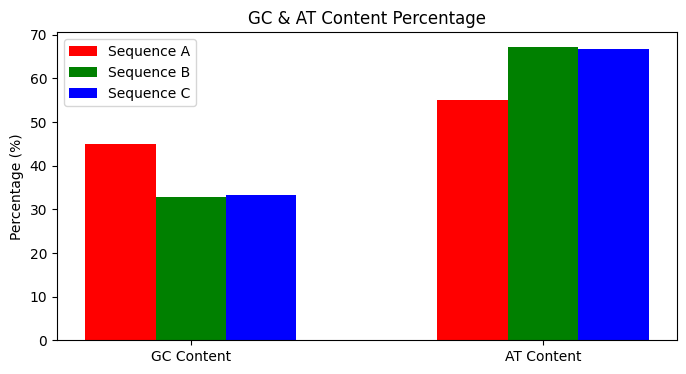

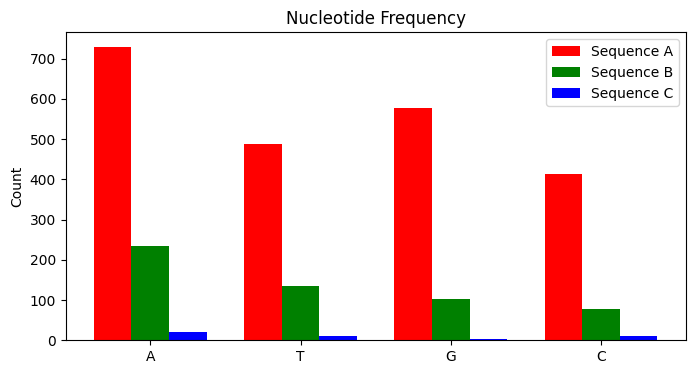

In [2]:
# Import Libraries

from Bio.SeqUtils import molecular_weight, MeltingTemp
from Bio.Seq import Seq
from Bio import pairwise2, SeqIO
import matplotlib.pyplot as plt
import random
from Levenshtein import distance


# Import Sequences


record1 = SeqIO.read('../02. SequenceSet/sequence1.fasta', 'fasta')
# print(record1.seq)

record2 = SeqIO.read('../02. SequenceSet/sequence2.fasta', 'fasta')
# print(record2.seq)

sequence_A = record1.seq
sequence_B = record2.seq


# Step 1: Combine sequences to create Sequence C


sequence_C = sequence_A[:15] + sequence_B[-30:]


# Step 2: String manipulation functions


def sequence_length(seq):
    return len(seq)

def reverse_sequence(seq):
    return seq[::-1]

def split_sequence(seq, n):
    return [seq[i:i + n] for i in range(0, len(seq), n)]

def nucleotide_at_index(seq, index):
    return seq[index] if index < len(seq) else "Index out of range"

def count_substring(seq, substring):
    return seq.count(substring)


# Step 3: Calculate Melting Temperature using Wallace's Rule


def melting_temp(seq):
    A = seq.count("A")
    T = seq.count("T")
    G = seq.count("G")
    C = seq.count("C")
    return 2 * (A + T) + 4 * (G + C)


# Step 4: Calculate Molecular Weight


def calculate_molecular_weight(seq):
    return molecular_weight(seq, seq_type='DNA')


# Step 5: GC and AT Content Percentage


def gc_content_percentage(seq):
    G = seq.count("G")
    C = seq.count("C")
    return (G + C) / len(seq) * 100

def at_content_percentage(seq):
    A = seq.count("A")
    T = seq.count("T")
    return (A + T) / len(seq) * 100


# Step 6: Nucleotide Frequency


def nucleotide_frequency(seq):
    return {"A": seq.count("A"), "T": seq.count("T"), "G": seq.count("G"), "C": seq.count("C")}


# Step 7: Plot results


def plot_results():
    
    # Datas

    molecular_weights = [calculate_molecular_weight(sequence_A), calculate_molecular_weight(sequence_B),
                         calculate_molecular_weight(sequence_C)]

    gc_contents = [gc_content_percentage(sequence_A), gc_content_percentage(sequence_B), gc_content_percentage(sequence_C)]
    at_contents = [at_content_percentage(sequence_A), at_content_percentage(sequence_B), at_content_percentage(sequence_C)]

    frequencies_A = nucleotide_frequency(sequence_A)
    frequencies_B = nucleotide_frequency(sequence_B)
    frequencies_C = nucleotide_frequency(sequence_C)

    # Molecular Weight Plot

    plt.figure(figsize=(8, 4))
    plt.bar(["Sequence A", "Sequence B", "Sequence C"], molecular_weights, color=['red', 'green', 'blue'])
    plt.title("Molecular Weight")
    plt.ylabel("Weight (g/mol)")
    plt.show()

    # GC Content and AT Content Plot

    plt.figure(figsize=(8, 4))
    x_labels = ["GC Content", "AT Content"]
    x_pos = range(len(x_labels))

    plt.bar([pos - 0.2 for pos in x_pos], [gc_contents[0], at_contents[0]], width=0.2, label="Sequence A", color='red')
    plt.bar(x_pos, [gc_contents[1], at_contents[1]], width=0.2, label="Sequence B", color='green')
    plt.bar([pos + 0.2 for pos in x_pos], [gc_contents[2], at_contents[2]], width=0.2, label="Sequence C", color='blue')
    plt.xticks(x_pos, x_labels)
    plt.title("GC & AT Content Percentage")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.show()

    # Nucleotide Frequency Plot

    plt.figure(figsize=(8, 4))
    bar_width = 0.25
    index = range(len(frequencies_A))

    plt.bar(index, list(frequencies_A.values()), bar_width, label="Sequence A", color='red')
    plt.bar([i + bar_width for i in index], list(frequencies_B.values()), bar_width, label="Sequence B", color='green')
    plt.bar([i + 2 * bar_width for i in index], list(frequencies_C.values()), bar_width, label="Sequence C", color='blue')

    plt.xticks([i + bar_width for i in index], frequencies_A.keys())
    plt.title("Nucleotide Frequency")
    plt.ylabel("Count")
    plt.legend()
    plt.show()


# Step 8: Transcription and Translation


def transcribe_and_translate(seq):
    dna_seq = Seq(seq)
    mrna_seq = dna_seq.transcribe()
    protein_seq = mrna_seq.translate()
    return str(mrna_seq), str(protein_seq)


# Step 9: Alignment and Comparison


def generate_random_sequence(length):
    return ''.join(random.choices("GCTA", k=length))

def compare_sequences(seq1, seq2):
    return distance(seq1, seq2)

def local_alignment(seq1, seq2):
    alignments = pairwise2.align.localms(seq1, seq2, 2, -1, -0.5, -0.1)
    return alignments[0].score if alignments else 0


# Generate Sequence D


sequence_D = generate_random_sequence(45)


# Compare Sequence D with A and B (Bonus with  Sequence C also)


sequence_A_first45 = sequence_A[:45]
sequence_B_first45 = sequence_B[:45]
sequence_C_first45 = sequence_C[:45]

levenshtein_A = compare_sequences(sequence_D, sequence_A_first45)
levenshtein_B = compare_sequences(sequence_D, sequence_B_first45)
levenshtein_C = compare_sequences(sequence_D, sequence_C_first45)

alignment_score_A = local_alignment(sequence_D, sequence_A_first45)
alignment_score_B = local_alignment(sequence_D, sequence_B_first45)
alignment_score_C = local_alignment(sequence_D, sequence_C_first45)


# Steps 10: Conclusion


# Results for all sequences


sequences = {"Sequence A": sequence_A, "Sequence B": sequence_B, "Sequence C": sequence_C}

for name, seq in sequences.items():
    print(f"\n{name}:")
    print(f"Sequence: {seq}")
    print(f"Length: {sequence_length(seq)}")
    print(f"Reversed: {reverse_sequence(seq)}")
    print(f"Split (5 bases): {split_sequence(seq, 5)}")
    print(f"Nucleotide at index 10: {nucleotide_at_index(seq, 10)}")
    print(f"Count of 'AT': {count_substring(seq, 'AT')}")
    print(f"Melting Temperature: {melting_temp(seq)}°C")
    print(f"Molecular Weight: {calculate_molecular_weight(seq):.2f} g/mol")
    print(f"GC Content: {gc_content_percentage(seq):.2f}%")
    print(f"AT Content: {at_content_percentage(seq):.2f}%")
    print(f"Nucleotide Frequency: {nucleotide_frequency(seq)}")
    mrna, protein = transcribe_and_translate(seq)
    print(f"mRNA Transcription: {mrna}")
    print(f"Protein Translation: {protein}")
    print("-"*50)


# Print comparison and alignment results


print(f"\nSequence D Comparison with Sequence A, B, and C: {sequence_D}")
print("-"*50+"\n")

print(f"Levenshtein Distance with Sequence A: {levenshtein_A}")
print(f"Levenshtein Distance with Sequence B: {levenshtein_B}")
print(f"Levenshtein Distance with Sequence C: {levenshtein_C}")
print("-"*50+"\n")

print(f"Alignment Score with Sequence A: {alignment_score_A}")
print(f"Alignment Score with Sequence B: {alignment_score_B}")
print(f"Alignment Score with Sequence C: {alignment_score_C}")
print("-"*50+"\n")


# Plot results


plot_results()


### Score Component
- Import Sequence from GenBank Files: Done
- Sequence String Manipulation: Done
- Sequence Analysis (Melting Temperature): Done
- Sequence Analysis (GC & AT Content): Done
- Sequence Analysis (Molecular Weight): Done
- Sequence Analysis (Nucleotides Base Frequency): Done
- Plotting: Done
- DNA, mRNA Protein Synthesis (Transcribe & Translate): Done

<code>Made By: NW25-1</code>